In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,Country,2000


In [3]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [80]:
c = cast
c = c[(c.character == 'Superman') | (c.character == 'Batman')].sort_values('year')
g = c.groupby(['year', 'character']).size()
u = g.unstack().fillna(0)
bs = u['Superman'] - u['Batman']
bs = bs[bs > 0]
len(bs)

13

### How many years have been "Batman years", with more Batman characters than Superman characters?

In [88]:
c = cast
c = c = c[(c.character == 'Superman') | (c.character == 'Batman')].sort_values('year')
g = c.groupby(['year', 'character']).size()
u = g.unstack().fillna(0)
bs = u['Batman'] - u['Superman']
len(bs[bs > 0])

23

### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

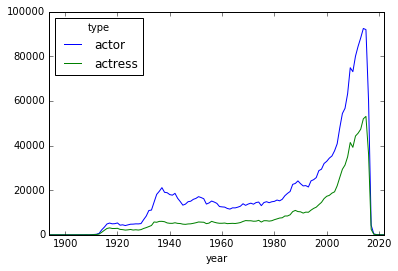

In [102]:
c = cast
c = c.groupby(['year', 'type']).size()
u = c.unstack().fillna(0)
u.plot();

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

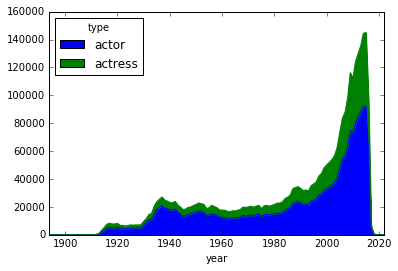

In [104]:
u.plot(kind='area');

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

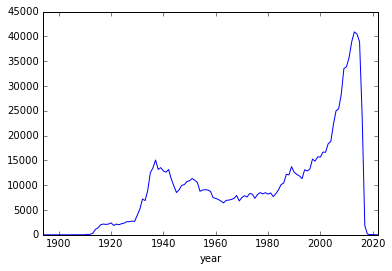

In [108]:
c = cast
c = c.groupby(['year', 'type']).size()
u = c.unstack().fillna(0)
u = u['actor'] - u['actress']
u.plot();

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

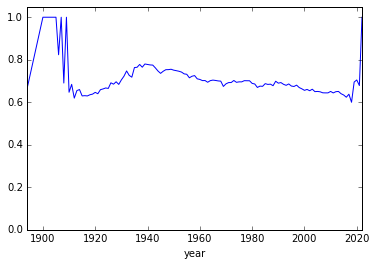

In [122]:
c = cast
c = c.groupby(['year', 'type']).size()
u = c.unstack().fillna(0)
f = u['actor'] / (u['actress'] + u['actor'])
f.plot(ylim=(0,1.05));

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

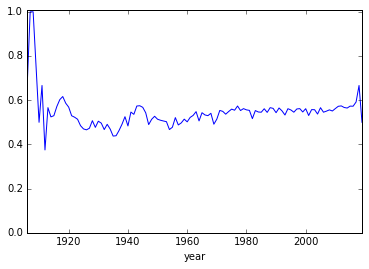

In [128]:
c = cast
c = c[c.n == 2]
g = c.groupby(['year', 'type']).size()
u = g.unstack().fillna(0)
f = u['actor'] / (u['actor'] + u['actress'])
f.plot(ylim=(0, 1.01));

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

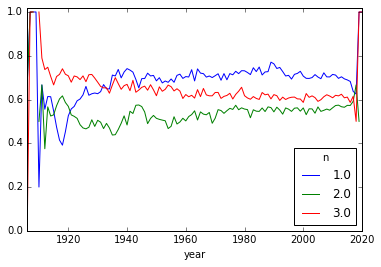

In [170]:
c = cast
c = c[(c.n >= 1) & (c.n <= 3)]
g = c.groupby(['year', 'type', 'n']).size()
u = g.unstack('type').fillna(0)
f = u['actor'] / (u['actor'] + u['actress'])
f.unstack().plot(ylim=(0, 1.02));

In [6]:
c = cast
c.groupby([c.year // 10 *10, 'type']).size()

year  type   
1890  actor           2
      actress         1
1900  actor          54
      actress        16
1910  actor       26788
      actress     15343
1920  actor       47018
      actress     23192
1930  actor      148389
      actress     48477
1940  actor      158390
      actress     50221
1950  actor      150803
      actress     54838
1960  actor      124646
      actress     53789
1970  actor      142324
      actress     62026
1980  actor      186874
      actress     86576
1990  actor      252832
      actress    119776
2000  actor      478039
      actress    257463
2010  actor      574954
      actress    320245
2020  actor          64
      actress        27
dtype: int64

In [52]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
c = c.groupby(['character', c.year // 10 * 10]).size()
c

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    1
                  1990    1
                  2000    1
dtype: int64

In [42]:
u = c.unstack(0).fillna(0)
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1,0
1980,4,1
1990,2,1
2000,1,1
2010,1,0


In [37]:
u.stack()

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    1
                  1990    1
                  2000    1
dtype: float64

In [43]:
u = u['Kermit the Frog'] - u['Oscar the Grouch']
u

year
1970    1
1980    3
1990    1
2000    0
2010    1
dtype: float64

In [48]:
c#.unstack('character')#.unstack('year')

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    1
                  1990    1
                  2000    1
dtype: int64

In [50]:
c.unstack('character').unstack('year')

character         year
Kermit the Frog   1970     1
                  1980     4
                  1990     2
                  2000     1
                  2010     1
Oscar the Grouch  1970   NaN
                  1980     1
                  1990     1
                  2000     1
                  2010   NaN
dtype: float64